In [28]:
#Load packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

#Load dataset 
path = '/Users/kassandrafuiten/'
data = pd.read_csv(path + 'all_data.csv')
data.head()

,Unnamed: 0,participant,random,block_num,block_exp_time,block_load,block_settings,trial_num,trial_exp_time,pres_letter,...,asrs_AB_raw_score_norm,asrs_AB_hit_score_norm,asrs_AB_att_hit_score_norm,asrs_AB_att_raw_score_norm,asrs_AB_hyp_hit_score_norm,asrs_AB_hyp_raw_score_norm,probe1_answ,probe2_answ,probe1_time,trial_score
0,0,1,False,0,294964.0,5.0,30,1.0,295252.0,G,...,2.5,0.222222,0.444444,3.0,0.0,2.0,0,0,NaN,1.0
1,1,1,False,0,294964.0,5.0,30,1.0,302333.0,C,...,2.5,0.222222,0.444444,3.0,0.0,2.0,0,0,NaN,1.0
2,2,1,False,0,294964.0,5.0,30,1.0,309393.0,P,...,2.5,0.222222,0.444444,3.0,0.0,2.0,0,0,NaN,1.0
3,3,1,False,0,294964.0,5.0,30,1.0,316437.0,L,...,2.5,0.222222,0.444444,3.0,0.0,2.0,0,0,NaN,1.0
4,4,1,False,0,294964.0,5.0,30,1.0,323500.0,R,...,2.5,0.222222,0.444444,3.0,0.0,2.0,0,0,NaN,1.0


First, we explore the data, checking the mean letter score percentage for each participant makes sense. In this score calculation, each letter is scored individually and is only counted correct if it is the the correct location in the sequence. 

   participant  random  block_num  block_exp_time  block_load  block_settings  \
0            1   False          0        294964.0         5.0              30   
1            1   False          0        294964.0         5.0              30   
2            1   False          0        294964.0         5.0              30   
3            1   False          0        294964.0         5.0              30   
4            1   False          0        294964.0         5.0              30   

   trial_num  trial_exp_time pres_letter  letter_pres_exp_time  ...  \
0        1.0        295252.0           G              295293.0  ...   
1        1.0        302333.0           C              302359.0  ...   
2        1.0        309393.0           P              309409.0  ...   
3        1.0        316437.0           L              316460.0  ...   
4        1.0        323500.0           R              323526.0  ...   

  asrs_AB_hit_score_norm  asrs_AB_att_hit_score_norm  \
0               0.222222      

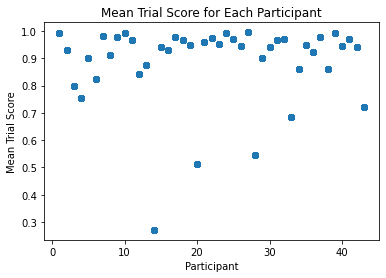

In [29]:
#Calculate mean trial score for each participant
data.groupby('participant')['trial_score'].mean()

#Add mean trial score to data frame
data['mean_trial_score'] = data.groupby('participant')['trial_score'].transform('mean')
data = data.drop(['Unnamed: 0'], axis=1)
print(data.head())
data.to_csv(path + 'all_data.csv')

#Plot mean trial score for each participant
plt.scatter(x=data['participant'], y=data['mean_trial_score'])
plt.xlabel('Participant')
plt.ylabel('Mean Trial Score')
plt.title('Mean Trial Score for Each Participant')
plt.show()

There's one clear outlier in our data frame: participant 14. Let's remove this participant and plot again. 

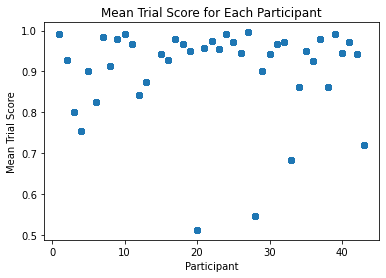

In [30]:
#Plot mean trial scores without participant 14. 
data = data[data['mean_trial_score'] > 0.5]
plt.scatter(x=data['participant'], y=data['mean_trial_score'])
plt.xlabel('Participant')
plt.ylabel('Mean Trial Score')
plt.title('Mean Trial Score for Each Participant')
plt.show()

We still have a couple of low-hanging data points near the 50% mark (participants 20 and 28) but, for now, let's leave those in. 

Next, let's investigate the mean trial score by trial duration. There were two potential durations of trials: 20 seconds and 30 seconds. 

block_settings
20    0.897817
30    0.910714
Name: trial_score, dtype: float64


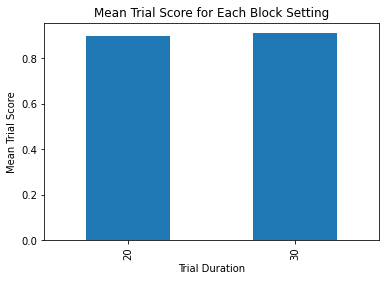

In [31]:
#Calculate mean trial score for each participant by trial duration
print(data.groupby(['block_settings'])['trial_score'].mean())

#Plot mean trial score for each participant by block_settings
data.groupby(['block_settings'])['trial_score'].mean().plot(kind='bar', stacked=False)
plt.xlabel('Trial Duration')
plt.ylabel('Mean Trial Score')
plt.title('Mean Trial Score for Each Block Setting')
plt.show()

The mean trial score for each duration looks very similar, but let's do a paried t-test to ensure that the difference in means is below change level.  

In [32]:
#Organize mean trial score for each participant by duration into two lists 
by_duration = data.groupby(['participant', 'block_settings'])['trial_score'].mean()
by_duration = by_duration.reset_index()
by_duration = by_duration.pivot(index='participant', columns='block_settings', values='trial_score')
column_lists = [by_duration[col].tolist() for col in by_duration]
short_duration, long_duration = column_lists

#Perform paired t-test to determine if there is a significant difference between mean trial score for each participant by duration
ttest_rel(short_duration, long_duration)

#As expected, the p-value is not significant (p = 0.154).

Ttest_relResult(statistic=-1.4512071570541716, pvalue=0.15433110922868085)

Even though there appears to be no difference between performance by duration across all participants, perhaps the effect of duration varies based on participants' ASRS scores. Within our sample, we have a nice distribution of ASRS scores.  

<AxesSubplot:xlabel='asrs_A_hit_score', ylabel='count'>

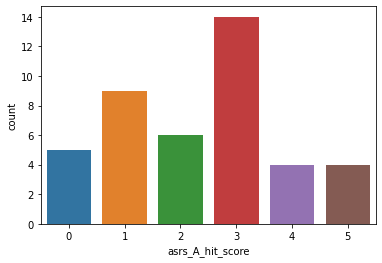

In [33]:
#Histogram of ASRS A scores
no_duplicates = data.drop_duplicates(subset=['participant'])
sns.countplot(data=no_duplicates, x='asrs_A_hit_score')

Let's also check for a relationship between ASRS scores and performance (again, performance here is only taking letter score into account). 

<AxesSubplot:xlabel='asrs_A_hit_score', ylabel='mean_trial_score'>

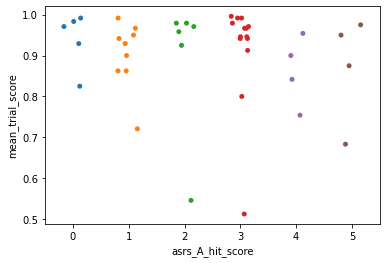

In [34]:
#Scatter plot of ASRS A scores and mean trial scores
sns.stripplot(x=no_duplicates['asrs_A_hit_score'], y=no_duplicates['mean_trial_score'], jitter=0.2, size=5)

#There doesn't appear to be a clear relationship between ASRS score and performance 

 There are a couple different ways define trait ADHD. Let's start by looking only at people who achieved a "hit" score on the ASRS (meaning that they answered "often" or "very often" on at least 4 of the first 6 questions). 

In [35]:
#Calculate mean trial score by whether or not ADHD was detected 
data.groupby('asrs_adhd_detected')['trial_score'].mean()

#As expected, the mean trial score is lower when ADHD was detected.

asrs_adhd_detected
False    0.913113
True     0.866667
Name: trial_score, dtype: float64

In [36]:
#Calculate mean trial score by whether or not ADHD was detected and by trial duration
print(data.groupby(['asrs_adhd_detected', 'block_settings'])['trial_score'].mean())

#This is interesting - long duration appears to benefit performance more when ADHD was detected.

asrs_adhd_detected  block_settings
False               20                0.911520
                    30                0.914706
True                20                0.839583
                    30                0.893750
Name: trial_score, dtype: float64


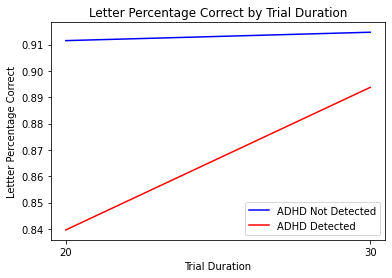

In [37]:
#Line plot of mean trial score by whether or not ADHD was detected and by trial duration
block_settings = [20, 30]
metric_values = [
    [0.911520, 0.914706],
    [0.839583, 0.893750]
]
plt.plot(block_settings, metric_values[0], label="ADHD Not Detected", color='blue')
plt.plot(block_settings, metric_values[1], label="ADHD Detected", color='red')
plt.xlabel("Trial Duration"); plt.ylabel("Lettter Percentage Correct"); plt.title("Letter Percentage Correct by Trial Duration")
x_ticks = [20, 30]; x_labels = ['20', '30']; plt.xticks(ticks = x_ticks, labels = x_labels)
plt.legend()
plt.show()

Let's see if the difference in means by duration is significant when ADHD is detected. 

In [38]:
#Subset data frame by whether or not ADHD was detected
adhd_detected = data[data['asrs_adhd_detected'] == True]
print(adhd_detected.groupby(['participant', 'block_settings'])['trial_score'].mean())

#Create lists for t-test
short_dur = [0.75, 0.866667, 0.783333, 0.875000, 0.966667, 0.966667, 0.941667, 0.566667]
long_dur = [0.758333, 0.933333,0.900000, 0.875000, 0.933333, 0.983333, 0.966667, 0.800000]

#Perform paired t-test to determine if there is a significant difference between mean trial score for each participant by duration
ttest_rel(short_dur, long_dur)

#The p-value is not quite significant (p = 0.116). 

participant  block_settings
4            20                0.750000
             30                0.758333
5            20                0.866667
             30                0.933333
12           20                0.783333
             30                0.900000
13           20                0.875000
             30                0.875000
19           20                0.966667
             30                0.933333
22           20                0.966667
             30                0.983333
23           20                0.941667
             30                0.966667
33           20                0.566667
             30                0.800000
Name: trial_score, dtype: float64


Ttest_relResult(statistic=-1.7929397171411328, pvalue=0.11607748551666194)

Notice that there's only 8 participants with ADHD "hit" scores. Perhaps it's more interesting to seperate participants into "high" vs. "low" trait-ADHD, with high-trait defined as scoring 3 or above on the ASRS A (ASRS A meaning those first 6 questions). This gives us two near-equal samples. 

In [39]:
#Calculate mean trial score by whether or not ADHD was detected and by trial duration
high_adhd = data[data['asrs_A_hit_score'] >= 3]
low_adhd = data[data['asrs_A_hit_score'] < 3]
high_adhd_mean = high_adhd.groupby(['block_settings'])['trial_score'].mean()  
low_adhd_mean = low_adhd.groupby(['block_settings'])['trial_score'].mean()
print('High Trait-ADHD:')
print(high_adhd_mean)
print('Low Trait-ADHD:')
print(low_adhd_mean)

High Trait-ADHD:
block_settings
20    0.887121
30    0.912500
Name: trial_score, dtype: float64
Low Trait-ADHD:
block_settings
20    0.909583
30    0.908750
Name: trial_score, dtype: float64


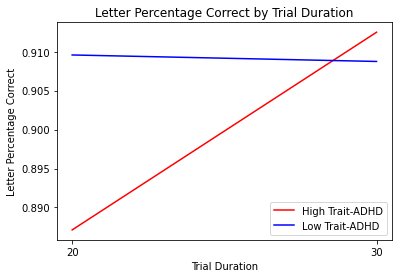

In [40]:
#Line plot of mean trial score by whether or not ADHD was detected and by trial duration
block_settings = [20, 30]
metric_values = [
    [0.887121, 0.912500],
    [0.909583, 0.908750]
]
plt.plot(block_settings, metric_values[0], label="High Trait-ADHD", color='red')
plt.plot(block_settings, metric_values[1], label="Low Trait-ADHD", color='blue')
plt.xlabel("Trial Duration"); plt.ylabel("Letter Percentage Correct"); plt.title("Letter Percentage Correct by Trial Duration")
x_ticks = [20, 30]; x_labels = ['20', '30']; plt.xticks(ticks = x_ticks, labels = x_labels)
plt.legend()
plt.show()

If there's any benefit to long duration for participants high in trait-ADHD, it's very small. Let's do a t-test to confirm this.

In [41]:
#Create lists for t-test
high_adhd_participants = high_adhd.groupby(['participant','block_settings'])['trial_score'].mean()
high_adhd = high_adhd.groupby(['participant','block_settings'])['trial_score'].mean().tolist()
short = high_adhd[::2]
long = high_adhd[1::2]

#Perform paired t-test to determine if there is a significant difference between mean trial score for high trait-ADHD participants by duration
ttest_rel(short, long)

#Again, not significant (p = 0.102).

Ttest_relResult(statistic=-1.7079255321640971, pvalue=0.10239240059193332)

In the original submitted data analysis plan, I had proposed computing a multiple regression equation to analyze the predictive power of the interaction between ADHD-level and trial duration on average percentage correct. However, the above analyses have indicated that, on their own, neither ADHD-level nor trial duration are closely associated with average percentage correct. Furthermore, there is a lot of variability in participants' performance. I fear that noise from individual variabilty would disguise any interaction between ADHD-level and trial duration in a multiple regression equation. 

Instead, I have computed a linear regression equation to analyze the predictive power of ADHD-level on the the difference in average percentage correct by duration. I expected that, as participants' ADHD level increases, the difference between their average score on long duration trials and short duration trials would also increase (with long durations typically resulting in better performance). 

The linear regression analysis was performed in R with the results documented below. 

![Alt text](Captura%20de%20pantalla%202023-05-27%20a%20la(s)%208.47.08%20p.m..png)

![Alt text](Captura%20de%20pantalla%202023-05-27%20a%20la(s)%208.54.55%20p.m..png)

The F-statistic p-value approaches significance, so it may be that ASRS score has some modulatory effect on the impact of duration on performance.

To do next: 

See if results differ when trials are scored as all-or-nothing 
AND with Levensteins 

AND 

Perform analysis for hyperactive vs. innattentive 